In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('drug_event_reports.csv')
df. head()

,Safety Report ID,Transmission Date,Serious,Seriousness Death,Received Date,Patient Age,Patient Sex,Reporter Country,Reactions,Drug Details
0,5801206-7,20090109,1,1.0,20080707,26.0,1.0,CANADA,DRUG ADMINISTRATION ERROR; OVERDOSE,"[{'drug_name': 'DURAGESIC-100', 'drug_indicati..."
1,10003300,20141002,1,NaN,20140306,77.0,2.0,US,Vomiting; Diarrhoea; Arthralgia; Headache,"[{'drug_name': 'BONIVA', 'drug_indication': 'O..."
2,10003301,20141002,1,NaN,20140228,NaN,2.0,US,Dyspepsia; Renal impairment,"[{'drug_name': 'IBUPROFEN', 'drug_indication':..."
3,10003302,20141002,2,NaN,20140312,NaN,1.0,US,Drug ineffective,"[{'drug_name': 'LYRICA', 'drug_indication': No..."
4,10003304,20141212,2,NaN,20140312,NaN,2.0,US,Drug hypersensitivity,"[{'drug_name': 'DOXYCYCLINE HYCLATE', 'drug_in..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Safety Report ID   10000 non-null  object 
 1   Transmission Date  10000 non-null  int64  
 2   Serious            10000 non-null  int64  
 3   Seriousness Death  707 non-null    float64
 4   Received Date      10000 non-null  int64  
 5   Patient Age        6650 non-null   float64
 6   Patient Sex        9926 non-null   float64
 7   Reporter Country   10000 non-null  object 
 8   Reactions          10000 non-null  object 
 9   Drug Details       10000 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 781.4+ KB


In [6]:
df.describe()

,Transmission Date,Serious,Seriousness Death,Received Date,Patient Age,Patient Sex
count,1.000000e+04,10000.000000,707.000000,1.000000e+04,6650.000000,9926.000000
mean,2.014430e+07,1.464200,1.008487,2.014031e+07,63.930827,1.492142
std,8.368302e+03,0.498742,0.091796,5.960894e+02,363.550099,0.660271
min,2.009011e+07,1.000000,1.000000,2.008071e+07,0.000000,0.000000
25%,2.014100e+07,1.000000,1.000000,2.014031e+07,47.000000,1.000000
50%,2.014100e+07,1.000000,1.000000,2.014031e+07,61.000000,2.000000
75%,2.014121e+07,2.000000,1.000000,2.014031e+07,72.000000,2.000000
max,2.024072e+07,2.000000,2.000000,2.014031e+07,22240.000000,2.000000


In [7]:
df.isnull().sum()

Safety Report ID        0
Transmission Date       0
Serious                 0
Seriousness Death    9293
Received Date           0
Patient Age          3350
Patient Sex            74
Reporter Country        0
Reactions               0
Drug Details            0
dtype: int64

In [10]:
df['Reactions'].head()

0          DRUG ADMINISTRATION ERROR; OVERDOSE
1    Vomiting; Diarrhoea; Arthralgia; Headache
2                  Dyspepsia; Renal impairment
3                             Drug ineffective
4                        Drug hypersensitivity
Name: Reactions, dtype: object

In [24]:
df['T_Date'] = pd.to_datetime(df['Transmission Date'].astype(str), format='%Y%m%d')
df['R_Date'] = pd.to_datetime(df['Received Date'].astype(str), format= '%Y%m%d')
df1= df.drop(columns= ['Transmission Date', 'Received Date'], axis='columns')
df1.head()

,Safety Report ID,Serious,Seriousness Death,Patient Age,Patient Sex,Reporter Country,Reactions,Drug Details,T_Date,R_Date
0,5801206-7,1,1.0,26.0,1.0,CANADA,DRUG ADMINISTRATION ERROR; OVERDOSE,"[{'drug_name': 'DURAGESIC-100', 'drug_indicati...",2009-01-09,2008-07-07
1,10003300,1,NaN,77.0,2.0,US,Vomiting; Diarrhoea; Arthralgia; Headache,"[{'drug_name': 'BONIVA', 'drug_indication': 'O...",2014-10-02,2014-03-06
2,10003301,1,NaN,NaN,2.0,US,Dyspepsia; Renal impairment,"[{'drug_name': 'IBUPROFEN', 'drug_indication':...",2014-10-02,2014-02-28
3,10003302,2,NaN,NaN,1.0,US,Drug ineffective,"[{'drug_name': 'LYRICA', 'drug_indication': No...",2014-10-02,2014-03-12
4,10003304,2,NaN,NaN,2.0,US,Drug hypersensitivity,"[{'drug_name': 'DOXYCYCLINE HYCLATE', 'drug_in...",2014-12-12,2014-03-12


In [ ]:
#Changing Datatype for Age and Seriousness Death from Float to Int
df1['Patient Age'] = df1['Patient Age'].astype('Int64') 
df1['Seriousness Death'] = df1['Seriousness Death'].astype('Int64')

#Replace values in column 'Patient Sex' from numerical codes to categorical labels (1.0 → 'M', 2.0 → 'F')
df1['Patient Sex'] = df1['Patient Sex'].replace({1.0: 'M', 2.0: 'F', 0.0: 'Unknown'})


#Fill NA in and Seriousness Death
df1['Seriousness Death'] = df1['Seriousness Death'].fillna(0)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9926 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Safety Report ID   9926 non-null   object        
 1   Serious            9926 non-null   int64         
 2   Seriousness Death  9926 non-null   Int64         
 3   Patient Age        9926 non-null   Int64         
 4   Patient Sex        9926 non-null   object        
 5   Reporter Country   9926 non-null   object        
 6   Reactions          9926 non-null   object        
 7   Drug Details       9926 non-null   object        
 8   T_Date             9926 non-null   datetime64[ns]
 9   R_Date             9926 non-null   datetime64[ns]
 10  reaction_list      9926 non-null   object        
dtypes: Int64(2), datetime64[ns](2), int64(1), object(6)
memory usage: 949.9+ KB


In [ ]:
#df1[df1['Patient Sex'].isna()].describe(include='all')

,Safety Report ID,Serious,Seriousness Death,Patient Age,Patient Sex,Reporter Country,Reactions,Drug Details,T_Date,R_Date,reaction_list
count,0,0.0,0.0,0.0,0,0,0,0,0,0,0
unique,0,NaN,<NA>,<NA>,0,0,0,0,NaN,NaN,0
top,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaT,NaT,NaN
min,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaT,NaT,NaN
25%,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaT,NaT,NaN
50%,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaT,NaT,NaN
75%,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaT,NaT,NaN
max,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaT,NaT,NaN


### Handling Missing Values in `Patient Sex`

Upon initial exploration, I found that the `Patient Sex` column contains **74 missing values** out of **10,000 records** (approximately **0.74%** of the dataset). Given that:

- The proportion of missing values is very small,
- The affected rows contain mostly `NaN` in other fields as well,
- And our analysis does not critically depend on these few entries,

I have decided to **remove these records** to maintain data quality and simplify downstream analysis.

In [91]:
df1= df1.dropna(subset='Patient Sex')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9926 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Safety Report ID   9926 non-null   object        
 1   Serious            9926 non-null   int64         
 2   Seriousness Death  9926 non-null   Int64         
 3   Patient Age        9926 non-null   Int64         
 4   Patient Sex        9926 non-null   object        
 5   Reporter Country   9926 non-null   object        
 6   Reactions          9926 non-null   object        
 7   Drug Details       9926 non-null   object        
 8   T_Date             9926 non-null   datetime64[ns]
 9   R_Date             9926 non-null   datetime64[ns]
 10  reaction_list      9926 non-null   object        
dtypes: Int64(2), datetime64[ns](2), int64(1), object(6)
memory usage: 949.9+ KB


### Exploding the `Reactions` Column

In the dataset, each safety report (`Report ID`) can contain multiple adverse reactions grouped together in a single field. To analyze these reactions more effectively, we decided to **explode the `Reactions` column**, so that each reaction is represented as a separate row linked to its corresponding `Report ID`.

This transformation allows us to:
- Perform more granular analysis of reaction types
- Identify the most frequently reported reactions
- Explore potential patterns in severity or frequency of adverse events

By normalizing this field, we gain clearer insights into individual reaction trends across all reports.


In [92]:
df_reactions= df1[['Safety Report ID','Reactions']].copy()
#df_reactions.head()

# Clean whitespaces and split by semicolon

df_reactions['reaction_list'] = df_reactions['Reactions'].str.lower().str.strip().str.split(';')
df_reactions = df_reactions.explode('reaction_list')
df_reactions['reaction_list'] = df_reactions['reaction_list'].str.strip()  # Remove any leading/trailing whitespace
df_reactions = df_reactions.drop(columns=['Reactions']) #dropped the Reactions column
df_reactions.head()

,Safety Report ID,reaction_list
0,5801206-7,drug administration error
0,5801206-7,overdose
1,10003300,vomiting
1,10003300,diarrhoea
1,10003300,arthralgia


### Normalizing the `Drug Details` Column

The `Drug Details` column contains a list of dictionaries for each report, where each dictionary provides structured information such as:

- `drug_name`
- `drug_indication`
- `administration_route`

Since each safety report may involve multiple drugs, I normalized this field by:

1. **Parsing the list of drug dictionaries** from the original string format.
2. **Exploding the list** so each drug entry becomes a separate row linked to its respective `Report ID`.
3. **Flattening the dictionary** using `pd.json_normalize()` to extract drug-related attributes into separate columns.

This results in a normalized `df_drugs` DataFrame, which allows to:

- Analyze drug usage patterns across reports
- Identify frequently reported drugs
- Explore correlations between drugs, indications, and administration routes

Keeping `df_drugs` as a standalone normalized table ensures a clean and scalable structure, while preserving the ability to join with other tables (e.g., `df_reactions`) via `Report ID` when needed.

In [93]:
import ast

# Step 1: Copy relevant columns
df_drugs = df1[['Safety Report ID', 'Drug Details']].copy()

# Step 2: Explode the list of drug dictionaries
df_drugs = df_drugs.explode('Drug Details')

# Step 3: Normalize each dictionary into flat columns
drug_info = pd.json_normalize(df_drugs['Drug Details'])

# Step 4: Drop the nested column and concatenate normalized columns
df_drugs = df_drugs.drop(columns=['Drug Details']).reset_index(drop=True)
df_drugs = pd.concat([df_drugs, drug_info], axis=1)


df_drugs[df_drugs['Safety Report ID'] == '10003304']

# Now df_drugs contains:
# - Safety Report ID
# - drug_name
# - drug_indication
# - administration_route
# (and any other nested keys from Drug Details)

,Safety Report ID,drug_name,drug_indication,administration_route
4,10003304,DOXYCYCLINE HYCLATE,None,None
5,10003304,TRAMADOL HYDROCHLORIDE,None,None
6,10003304,OXYCONTIN,None,None
7,10003304,TALWIN,None,None
8,10003304,CODEINE,None,None
9,10003304,IODINE,None,None
10,10003304,ASPIRIN,None,None
11,10003304,LORTAB,None,None
12,10003304,FIORINAL,None,None


### Handling Missing and Invalid Patient Age

The `Patient Age` field had 9 records with a value of 0 and 3,350 records with missing values, totaling over 33% of the dataset.  
To maintain data integrity:

- Values of `0` were treated as invalid and replaced with `NaN`
- No imputation was applied, given the sensitive nature of patient demographics in healthcare datasets
- For age-related analysis, only records with valid age data were considered

In [ ]:
df_primary = df1.copy()

df_primary = df_primary.drop(columns=['Reactions', 'Drug Details','reaction_list'])
df_primary['Patient Age'] = df_primary['Patient Age'].replace(0, np.nan)
df_primary = df_primary[
    (df_primary['Patient Age'].isna()) | 
    ((df_primary['Patient Age'] >= 0) & (df_primary['Patient Age'] <= 120))
]


df_primary['Patient Age'].isna().sum()
#df_primary[df_primary['Patient Sex'] ==0.0]

3300

### ✅ Final Prepared Tables for EDA

After performing data cleaning, transformation, and normalization, we now have three well-structured and analysis-ready DataFrames:

- **`df_primary`**  
  Contains core patient and report-level information:  
  `Safety Report ID`, `Serious`, `Seriousness Death`, `Patient Age`, `Patient Sex`, `Reported Country`, `T_Date`, `R_Date`

- **`df_reactions`**  
  Captures individual adverse reactions linked to each report:  
  `Safety Report ID`, `reaction_list`

- **`df_drugs`**  
  Stores normalized drug information associated with each report:  
  `Safety Report ID`, `drug_name`, `drug_indication`, `administration_route`

The data is now cleaned and normalized. We are ready to proceed with **Exploratory Data Analysis (EDA)** to uncover insights related to drug safety, reaction patterns, and patient demographics.

### Q. Distribution of Reports by Patient Sex
- **`Insights`** - 
    F     -         5808
    M      -      3195
    Unknown   -   923

-   Female Patients have High number of Reported Events: 58.5%
-   Male Patients are on Second number : 32.2%

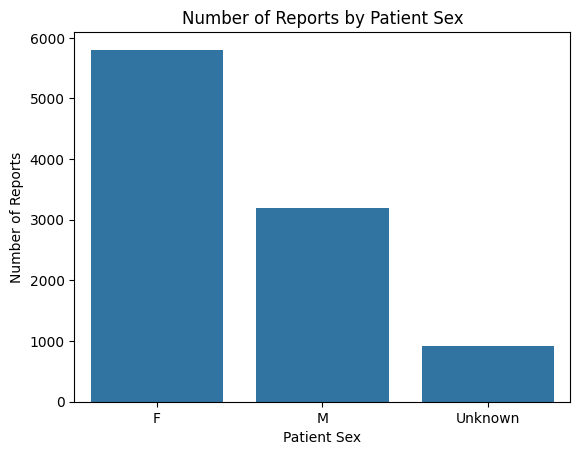

In [127]:
sns.countplot(data=df_primary, x='Patient Sex', order=df_primary['Patient Sex'].value_counts().index)
plt.title('Number of Reports by Patient Sex')
plt.xlabel('Patient Sex')
plt.ylabel('Number of Reports')
plt.show()

In [118]:
df_age_valid = df_primary[df_primary['Patient Age'].notnull()]
df_age_valid.head()

,Safety Report ID,Serious,Seriousness Death,Patient Age,Patient Sex,Reporter Country,T_Date,R_Date
0,5801206-7,1,1,26,M,CANADA,2009-01-09,2008-07-07
1,10003300,1,0,77,F,US,2014-10-02,2014-03-06
5,10003305,2,0,48,F,US,2014-10-02,2014-03-12
6,10003306,2,0,68,F,US,2015-11-25,2014-03-12
7,10003307,2,0,65,F,US,2015-11-25,2014-03-12


### Q. Distribution of Reports by Patients Age

- Patient Age data is missing for 3300 records (which is such large number), cannot be used for Insight.
-  Patient with Age Group 61-75 have reported largely (2183)- 23%
- Patient with Age of 90+ have reported less number of reporting Adverse events. 


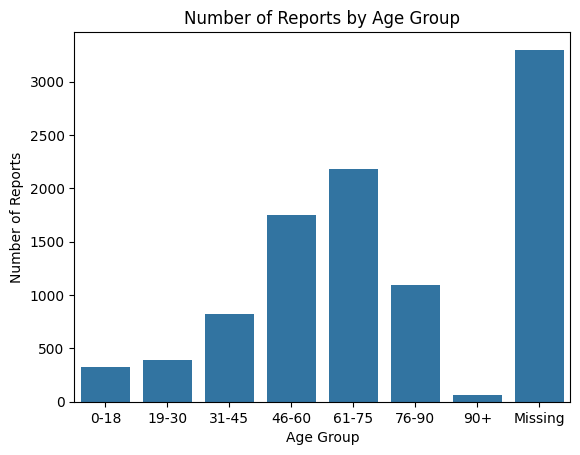

Age Group
Missing    3300
61-75      2183
46-60      1746
76-90      1093
31-45       823
19-30       387
0-18        330
90+          60
Name: count, dtype: int64

In [133]:
age_bins = [0, 18, 30, 45, 60, 75, 90, 120]
age_labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76-90', '90+']
df_primary['Age Group'] = pd.cut(df_primary['Patient Age'], bins=age_bins, labels=age_labels)


df_primary['Age Group'] = df_primary['Age Group'].cat.add_categories('Missing')
df_primary['Age Group'] = df_primary['Age Group'].fillna('Missing')


sns.countplot(data=df_primary, x='Age Group')
plt.title('Number of Reports by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Reports')
plt.show() 

df_primary['Age Group'].value_counts()

### Q. Reports by Countries
- Most of the Reporting has come from US.

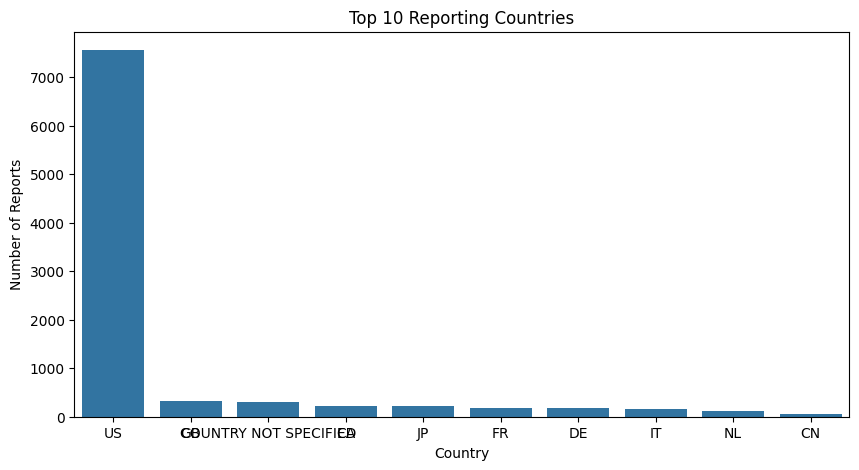

In [134]:
top_countries = df_primary['Reporter Country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Reporting Countries')
plt.ylabel('Number of Reports')
plt.xlabel('Country')
plt.show()

In [135]:
#df_primary[df_primary['Age Group'] == 'NaN']
df_primary.head(8)

,Safety Report ID,Serious,Seriousness Death,Patient Age,Patient Sex,Reporter Country,T_Date,R_Date,Age Group
0,5801206-7,1,1,26,M,CANADA,2009-01-09,2008-07-07,19-30
1,10003300,1,0,77,F,US,2014-10-02,2014-03-06,76-90
2,10003301,1,0,<NA>,F,US,2014-10-02,2014-02-28,Missing
3,10003302,2,0,<NA>,M,US,2014-10-02,2014-03-12,Missing
4,10003304,2,0,<NA>,F,US,2014-12-12,2014-03-12,Missing
5,10003305,2,0,48,F,US,2014-10-02,2014-03-12,46-60
6,10003306,2,0,68,F,US,2015-11-25,2014-03-12,61-75
7,10003307,2,0,65,F,US,2015-11-25,2014-03-12,61-75


### Q. Serious vs Non-Serious Cases

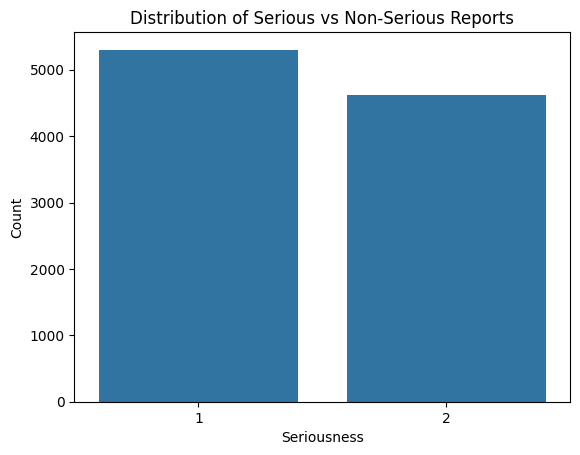

Serious
1    5301
2    4621
Name: count, dtype: int64

In [139]:
sns.countplot(data=df_primary, x='Serious')
plt.title('Distribution of Serious vs Non-Serious Reports')
plt.xlabel('Seriousness')
plt.ylabel('Count')
plt.show()

df_primary['Serious'].value_counts()

### Q. Number of Reports resulted in Deaths

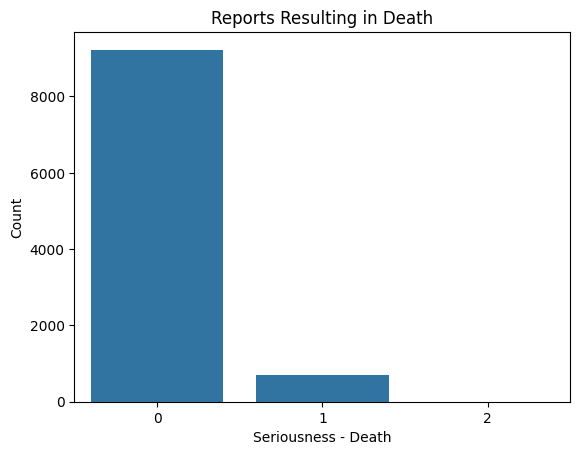

Seriousness Death
0    9226
1     691
2       5
Name: count, dtype: Int64

In [146]:
sns.countplot(data=df_primary, x='Seriousness Death')
plt.title('Reports Resulting in Death')
plt.xlabel('Seriousness - Death')
plt.ylabel('Count')
plt.show()

df_primary['Seriousness Death'].value_counts()

### Time Trend Analysis: 
### Q: How has the number of reports changed over time?

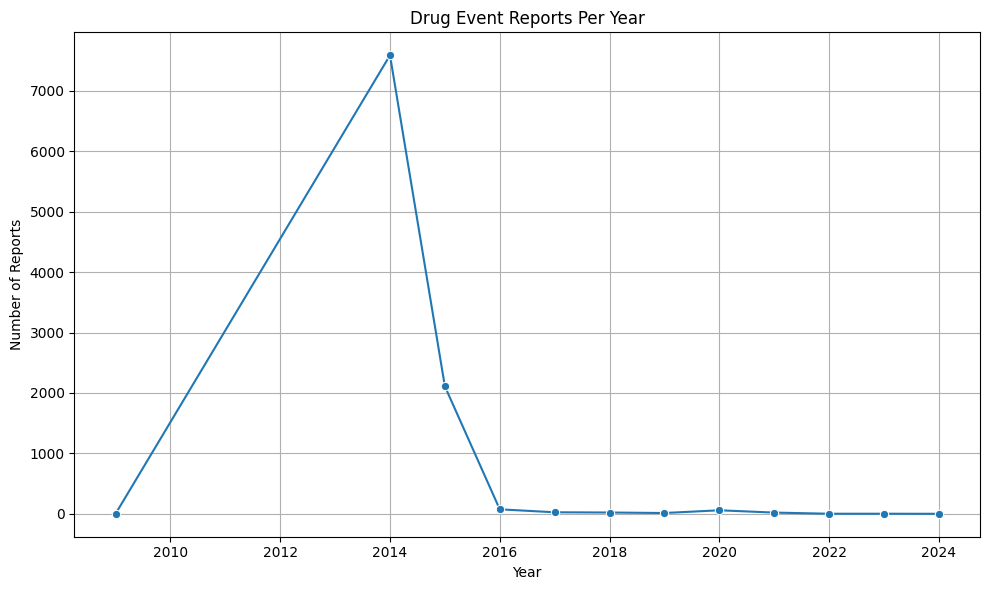

In [147]:
# Extract year and month
df_primary['Year'] = df_primary['T_Date'].dt.year
df_primary['Month'] = df_primary['T_Date'].dt.month

# Reports per year
reports_per_year = df_primary.groupby('Year').size().reset_index(name='Report Count')


plt.figure(figsize=(10, 6))
sns.lineplot(data=reports_per_year, x='Year', y='Report Count', marker='o')
plt.title('Drug Event Reports Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.grid(True)
plt.tight_layout()
plt.show()

### Q: Are there seasonal trends in reporting?

/var/folders/l6/hmqfvyqx5jxf3rgqv74jqk100000gn/T/ipykernel_3764/118297672.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_trend, x='Month', y='Report Count', palette='coolwarm')


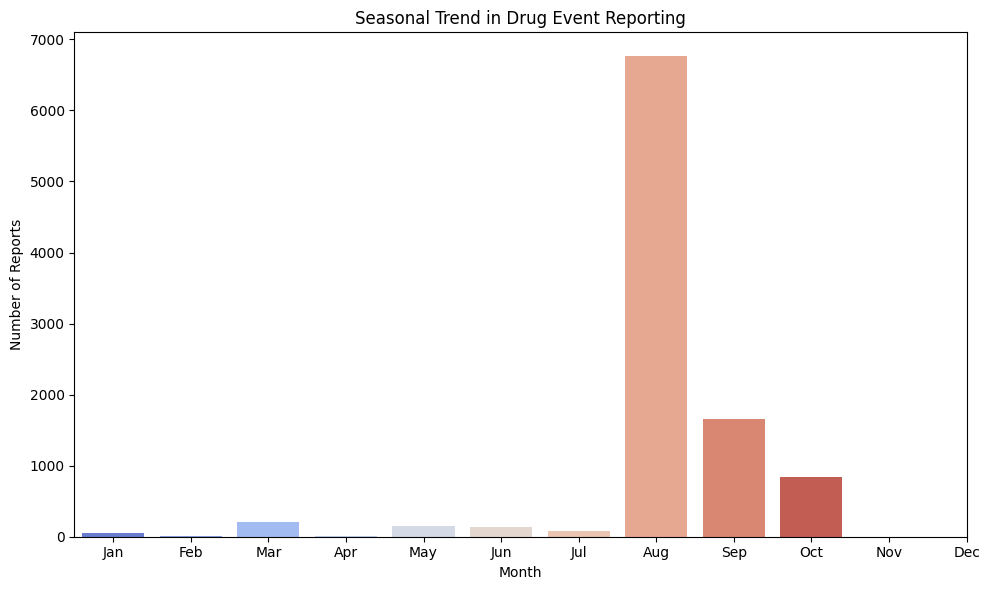

In [148]:
# If not already extracted
df_primary['Month'] = df_primary['T_Date'].dt.month

# Group by month (across years)
monthly_trend = df_primary.groupby('Month').size().reset_index(name='Report Count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_trend, x='Month', y='Report Count', palette='coolwarm')
plt.title('Seasonal Trend in Drug Event Reporting')
plt.xlabel('Month')
plt.ylabel('Number of Reports')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.tight_layout()
plt.show()

### Drug Analysis

### Q: What are the Top 10 Most Frequently Reported Drugs?

/var/folders/l6/hmqfvyqx5jxf3rgqv74jqk100000gn/T/ipykernel_3764/3865742502.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_drugs, x='Report Count', y='Drug Name', palette='Blues_r')


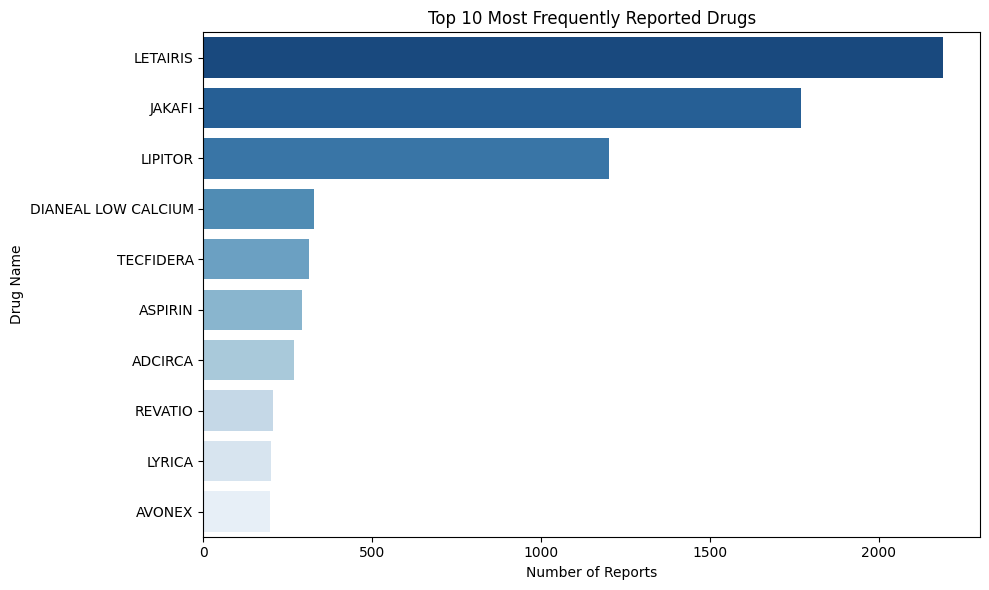

drug_name
LETAIRIS                    2191
JAKAFI                      1770
LIPITOR                     1202
DIANEAL LOW CALCIUM          327
TECFIDERA                    312
                            ... 
PAROXETINE HYDROCHLORIDE       1
TERZOSIN                       1
BUPROPION XL                   1
TESTOSTERONE INJECTION         1
METHOCARBAMOL.                 1
Name: count, Length: 5236, dtype: int64

In [151]:
# Count the number of times each drug appears
top_drugs = df_drugs['drug_name'].value_counts().head(10).reset_index()
top_drugs.columns = ['Drug Name', 'Report Count']

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=top_drugs, x='Report Count', y='Drug Name', palette='Blues_r')
plt.title('Top 10 Most Frequently Reported Drugs')
plt.xlabel('Number of Reports')
plt.ylabel('Drug Name')
plt.tight_layout()
plt.show()


df_drugs['drug_name'].value_counts()

###  Q: What Are the Most Common Drug Indications?

/var/folders/l6/hmqfvyqx5jxf3rgqv74jqk100000gn/T/ipykernel_3764/2176468294.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_indications, x='Report Count', y='Drug Indication', palette='Greens_r')


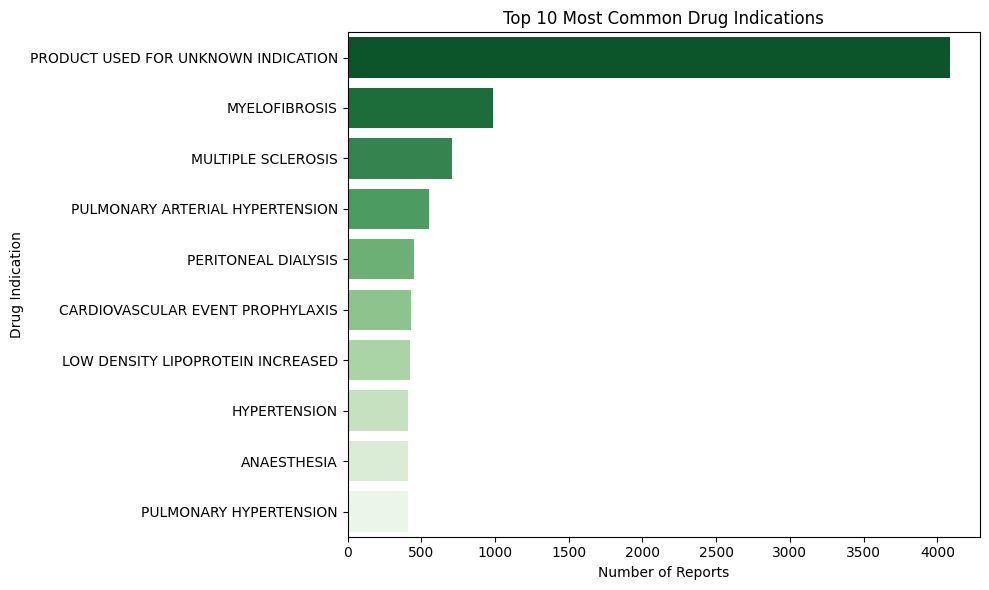

In [152]:
# Count the top 10 most common drug indications
top_indications = df_drugs['drug_indication'].value_counts().head(10).reset_index()
top_indications.columns = ['Drug Indication', 'Report Count']

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=top_indications, x='Report Count', y='Drug Indication', palette='Greens_r')
plt.title('Top 10 Most Common Drug Indications')
plt.xlabel('Number of Reports')
plt.ylabel('Drug Indication')
plt.tight_layout()
plt.show()

### Q: Which Routes of Administration Are Most Common in Serious Cases?
- Understanding how a drug is administered can reveal patterns in adverse outcomes. For example, intravenous or transdermal routes might show different safety profiles than oral.

- Understanding how a drug is administered can reveal patterns in adverse outcomes. For example, intravenous or transdermal routes might show different safety profiles than oral.

/var/folders/l6/hmqfvyqx5jxf3rgqv74jqk100000gn/T/ipykernel_3764/1130198517.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_routes, x='Serious Report Count', y='Administration Route', palette='Oranges_r')


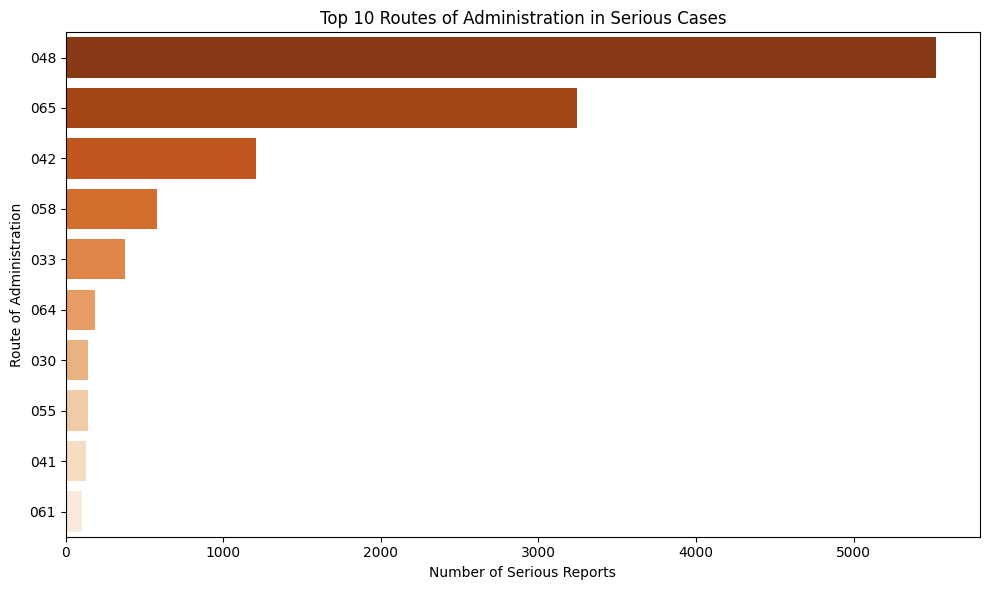

In [153]:
# Step 1: Filter serious cases
serious_cases = df_primary[df_primary['Serious'] == 1]  # Assuming 1 = serious

# Step 2: Merge with df_drugs on Safety Report ID
serious_drugs = pd.merge(serious_cases[['Safety Report ID']], df_drugs, on='Safety Report ID', how='inner')

# Step 3: Count most common routes
top_routes = serious_drugs['administration_route'].value_counts().head(10).reset_index()
top_routes.columns = ['Administration Route', 'Serious Report Count']

# Step 4: Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=top_routes, x='Serious Report Count', y='Administration Route', palette='Oranges_r')
plt.title('Top 10 Routes of Administration in Serious Cases')
plt.xlabel('Number of Serious Reports')
plt.ylabel('Route of Administration')
plt.tight_layout()
plt.show()

### Q.Which drugs are most commonly associated with serious or death-related reports?

/var/folders/l6/hmqfvyqx5jxf3rgqv74jqk100000gn/T/ipykernel_3764/3033301551.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_serious_drugs, x='Serious/Death Report Count', y='Drug Name', palette='Reds_r')


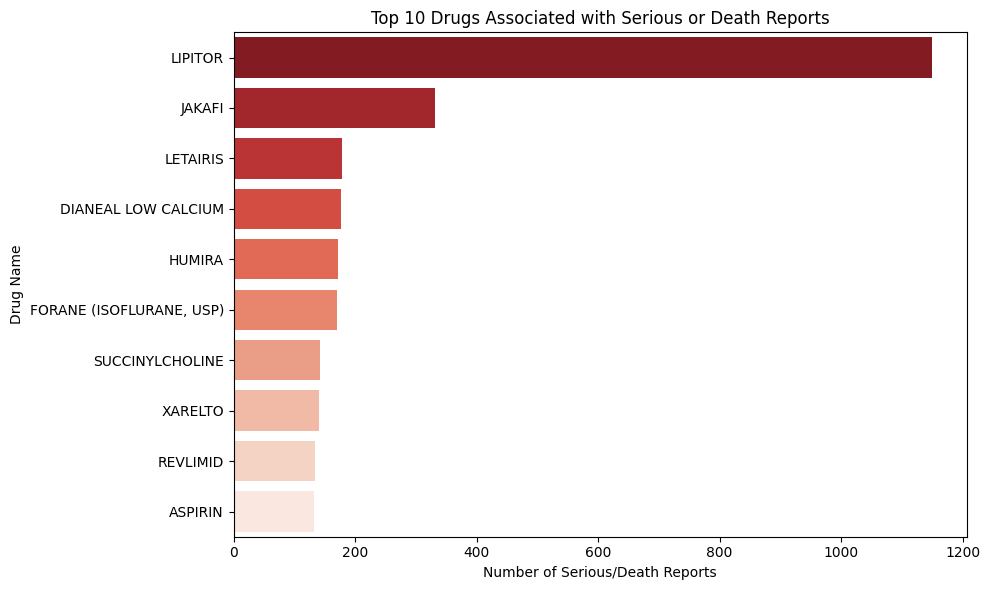

In [154]:
# Step 1: Filter serious or death cases
serious_or_death = df_primary[(df_primary['Serious'] == 1) | (df_primary['Seriousness Death'] == 1)]

# Step 2: Merge with drug data
serious_drug_reports = pd.merge(serious_or_death[['Safety Report ID']], df_drugs, on='Safety Report ID', how='inner')

# Step 3: Count top drugs
top_serious_drugs = serious_drug_reports['drug_name'].value_counts().head(10).reset_index()
top_serious_drugs.columns = ['Drug Name', 'Serious/Death Report Count']

# Step 4: Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_serious_drugs, x='Serious/Death Report Count', y='Drug Name', palette='Reds_r')
plt.title('Top 10 Drugs Associated with Serious or Death Reports')
plt.xlabel('Number of Serious/Death Reports')
plt.ylabel('Drug Name')
plt.tight_layout()
plt.show()

/var/folders/l6/hmqfvyqx5jxf3rgqv74jqk100000gn/T/ipykernel_3764/2513437181.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_reactions, x='Count', y='Reaction', palette='viridis')


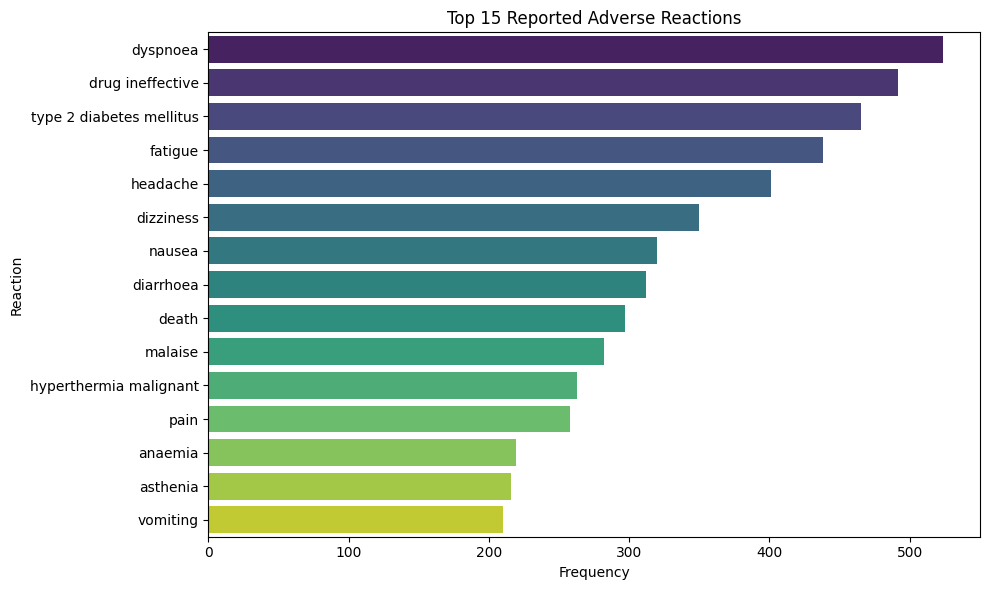

In [155]:
#Most Frequently Reported Adverse Reactions
top_reactions = df_reactions['reaction_list'].value_counts().head(15).reset_index()
top_reactions.columns = ['Reaction', 'Count']

plt.figure(figsize=(10,6))
sns.barplot(data=top_reactions, x='Count', y='Reaction', palette='viridis')
plt.title('Top 15 Reported Adverse Reactions')
plt.xlabel('Frequency')
plt.ylabel('Reaction')
plt.tight_layout()
plt.show()

/var/folders/l6/hmqfvyqx5jxf3rgqv74jqk100000gn/T/ipykernel_3764/1429658718.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_serious_reactions, x='Serious Report Count', y='Reaction', palette='magma')


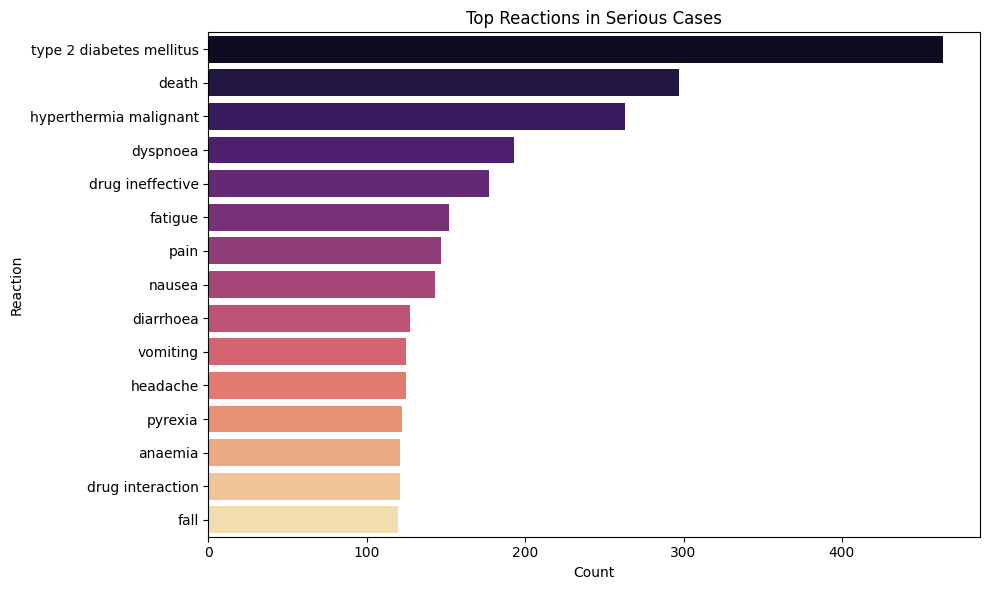

In [156]:
#Reactions Most Often Marked as Serious

# Merge with serious reports
serious_reactions = pd.merge(df_primary[df_primary['Serious'] == 1][['Safety Report ID']], 
                             df_reactions, on='Safety Report ID')

top_serious_reactions = serious_reactions['reaction_list'].value_counts().head(15).reset_index()
top_serious_reactions.columns = ['Reaction', 'Serious Report Count']

plt.figure(figsize=(10,6))
sns.barplot(data=top_serious_reactions, x='Serious Report Count', y='Reaction', palette='magma')
plt.title('Top Reactions in Serious Cases')
plt.xlabel('Count')
plt.ylabel('Reaction')
plt.tight_layout()
plt.show()

/var/folders/l6/hmqfvyqx5jxf3rgqv74jqk100000gn/T/ipykernel_3764/4208060354.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_gender_reactions = gender_reactions.groupby('Patient Sex').apply(lambda x: x.sort_values('Count', ascending=False).head(5)).reset_index(drop=True)


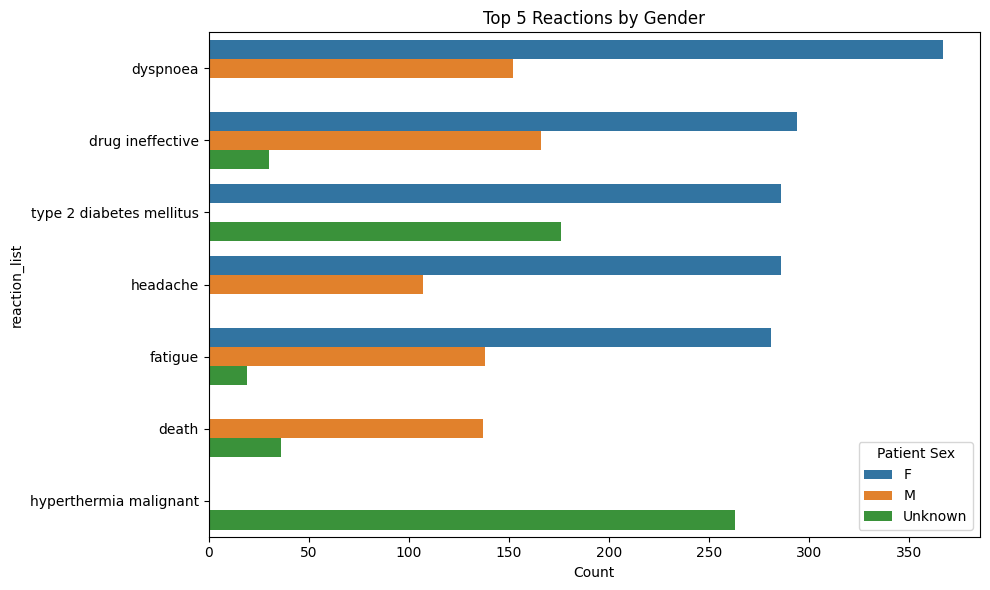

In [157]:
#Reactions by Age or Gender

# Merge with patient info
reaction_demographics = pd.merge(df_reactions, df_primary[['Safety Report ID', 'Patient Sex', 'Age Group']], 
                                 on='Safety Report ID')

# Top reactions by gender
gender_reactions = reaction_demographics.groupby(['Patient Sex', 'reaction_list']).size().reset_index(name='Count')
top_gender_reactions = gender_reactions.groupby('Patient Sex').apply(lambda x: x.sort_values('Count', ascending=False).head(5)).reset_index(drop=True)

plt.figure(figsize=(10,6))
sns.barplot(data=top_gender_reactions, x='Count', y='reaction_list', hue='Patient Sex')
plt.title('Top 5 Reactions by Gender')
plt.tight_layout()
plt.show()

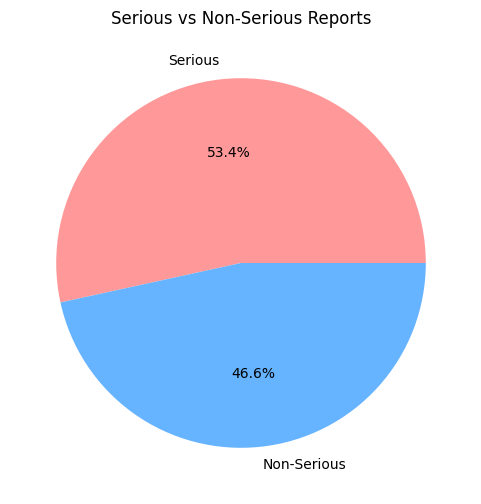

In [160]:
# Pie Chart: Serious vs Non-Serious Cases
serious_counts = df_primary['Serious'].value_counts().rename({1: 'Serious', 2: 'Non-Serious'})

plt.figure(figsize=(6,6))
plt.pie(serious_counts, labels=serious_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Serious vs Non-Serious Reports')
plt.show()

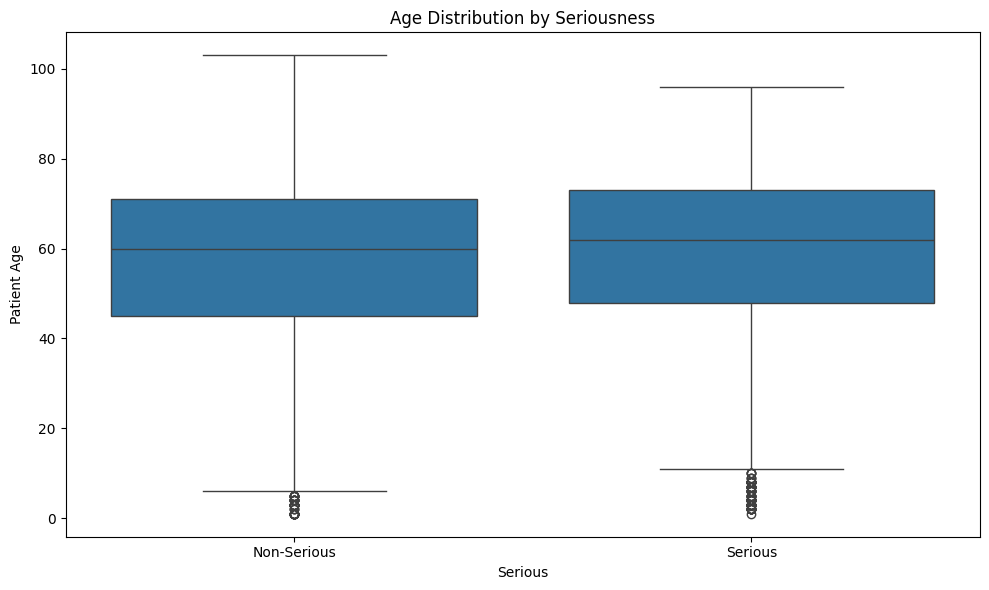

In [161]:
#Boxplot: Age Group by Seriousness
plt.figure(figsize=(10,6))
sns.boxplot(data=df_primary, x='Serious', y='Patient Age')
plt.title('Age Distribution by Seriousness')
plt.xticks([0, 1], ['Non-Serious', 'Serious'])
plt.tight_layout()
plt.show()